In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

prep_data = pd.read_csv("Prep-CustomerDemographic.csv")

In [3]:
prep_data.loc[prep_data.Age==174, 'Age'] = 74

In [4]:
prep_data.describe()

,customer_id,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,Age
count,3998.000000,3998.000000,3998.000000,3342.000000,3998.000000,3998.000000,3911.000000,3911.000000
mean,2000.364432,0.553777,48.871186,4.098743,1.755378,0.505753,10.658655,39.937356
std,1154.618313,0.539632,28.709682,2.524434,0.834093,0.500029,5.661042,12.626806
min,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,15.000000
25%,1001.250000,0.000000,24.000000,2.000000,1.000000,0.000000,6.000000,30.000000
50%,2000.500000,1.000000,48.000000,4.000000,1.500000,1.000000,11.000000,40.000000
75%,2999.750000,1.000000,73.000000,7.000000,3.000000,1.000000,15.000000,49.000000
max,4000.000000,2.000000,99.000000,9.000000,3.000000,1.000000,22.000000,86.000000


### Univariate Analysis - Types of Variables

#### Continuous  
3 - past_3_year_bike_related_purchases(p3)  
3 - tenure (in months)   
2 - Age  

#### Categorical 
2 - wealth_segment   
2 - owns_car  
1 - gender   
1 - job_industry_category   

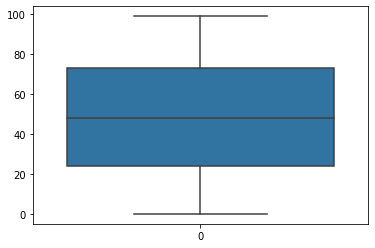

In [5]:
sns.boxplot(data=prep_data['past_3_years_bike_related_purchases'])

###  Bivariate Analysis
Continuous-Continuous  : p3-tenure-Age  
Categorical-Categorical :  
Continuous-Categorical : 

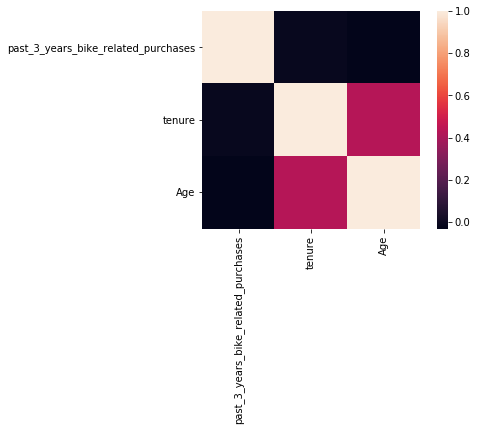

In [6]:
cont_var = prep_data[['past_3_years_bike_related_purchases', 'tenure', 'Age']]
corr_mat = cont_var.corr()
sns.heatmap(corr_mat, square=True)

No-correlation between 'p3' and 'tenure or age' is because how long may be the 'tenure' of customer, time period of observation is fixed to 3 years.

Weak correlation between 'tenure' and 'age' can be justified as loyalty of the purchasing customers, which is a good sign for business.

Text(0.5, 0, 'tenure in Months')

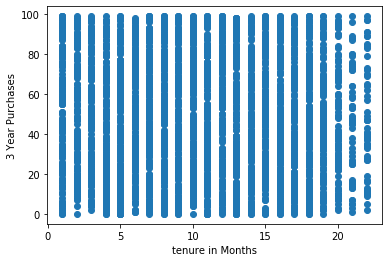

In [7]:
plt.scatter(x=prep_data['tenure'], y=prep_data['past_3_years_bike_related_purchases'])
plt.ylabel('3 Year Purchases')
plt.xlabel('tenure in Months')

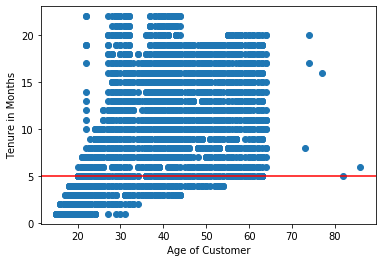

In [8]:
plt.scatter(x=prep_data['Age'], y=prep_data['tenure'])
plt.ylabel('Tenure in Months')
plt.xlabel('Age of Customer')
plt.axhline(y=5, color="red")

Text(0, 0.5, '3 Year Purchases')

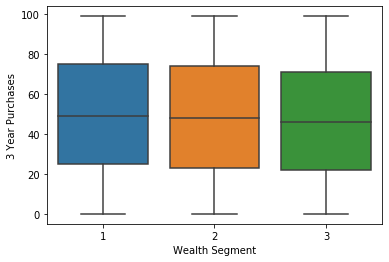

In [9]:
sns.boxplot(x=prep_data['wealth_segment'], y=prep_data['past_3_years_bike_related_purchases'])
plt.xlabel('Wealth Segment')
plt.ylabel('3 Year Purchases')
# Almost Equal

Text(0, 0.5, '3 Year Purchases')

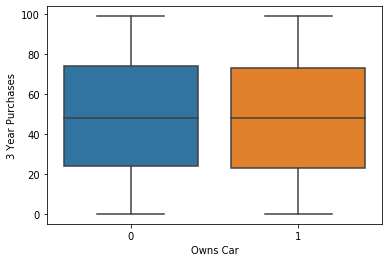

In [10]:
sns.boxplot(x=prep_data['owns_car'], y=prep_data['past_3_years_bike_related_purchases'])
plt.xlabel('Owns Car')
plt.ylabel('3 Year Purchases')
# Almost Equal

Text(0, 0.5, '3 Year Purchases')

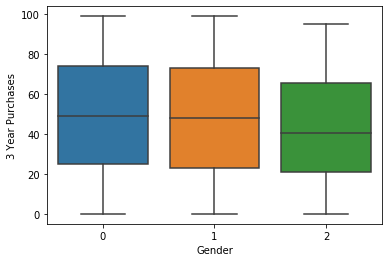

In [11]:
sns.boxplot(x=prep_data['gender'], y=prep_data['past_3_years_bike_related_purchases'])
plt.xlabel('Gender')
plt.ylabel('3 Year Purchases')
# People with gender 2 (U) - has slightly lesser magnitude of total purchases - Should not influence marketing strategies

Text(0, 0.5, '3 Year Purchases')

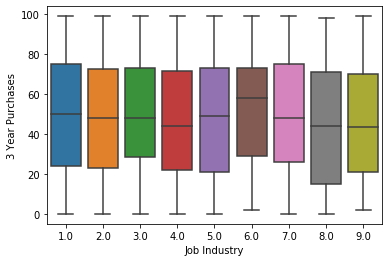

In [12]:
sns.boxplot(x=prep_data['job_industry_category'], y=prep_data['past_3_years_bike_related_purchases'])
plt.xlabel('Job Industry')
plt.ylabel('3 Year Purchases')
# Job Industry 6 (Agriculture) - Has slightly higher purchases

### Outlier Analysis

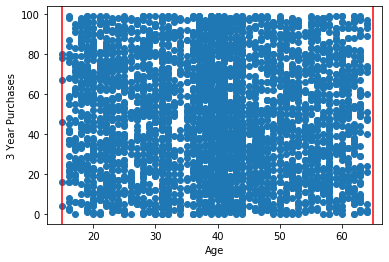

In [16]:
plt.scatter(x=prep_data['Age'], y=prep_data['past_3_years_bike_related_purchases'])
plt.ylabel('3 Year Purchases')
plt.xlabel('Age')
plt.axvline(x=15, color='red')
plt.axvline(x=65, color='red')

In [17]:
prep_data_copy = prep_data

In [15]:
prep_data.drop(prep_data[prep_data.Age>64].index, inplace=True)

### Missing Value Treatment

Text(0, 0.5, 'Age')

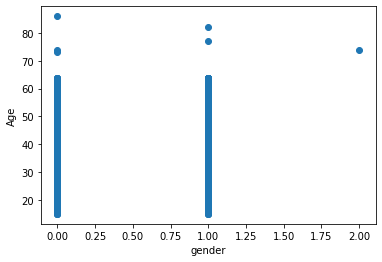

In [71]:
plt.scatter(x=prep_data['gender'], y=prep_data['Age'])
plt.xlabel('gender')
plt.ylabel('Age')

#plt.axvline(x=15, color='red')
#plt.axvline(x=65, color='red')

Text(0, 0.5, 'tenure')

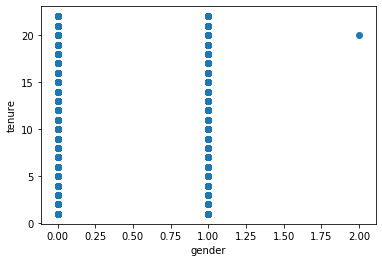

In [74]:
plt.scatter(x=prep_data['gender'], y=prep_data['tenure'])
plt.xlabel('gender')
plt.ylabel('tenure')

#plt.axvline(x=15, color='red')
#plt.axvline(x=65, color='red')

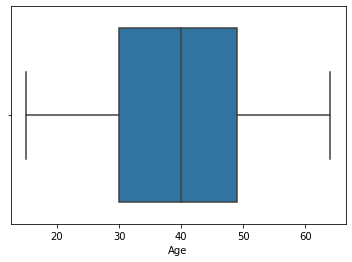

In [18]:
sns.boxplot(x=prep_data['Age'])

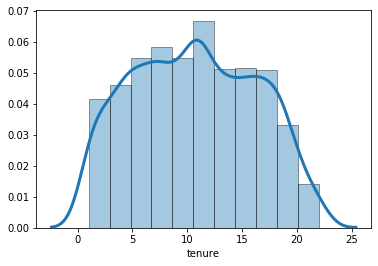

In [42]:
sns.distplot(prep_data['tenure'], bins=11, 
             hist=True, kde=True,
             hist_kws = {'edgecolor':'black'},
             kde_kws = {'linewidth':3}
            )

In [43]:
print('Mean = ', prep_data['tenure'].mean())
print('Median = ', prep_data['tenure'].median())
print('Mode = ', prep_data['tenure'].mode())

Mean =  10.664078156312625
Median =  11.0
Mode =  0    11.0
dtype: float64


In [41]:
prep_data['tenure'].fillna(prep_data['tenure'].median(), inplace=True)

In [44]:
prep_data['Age'].fillna(prep_data['Age'].median(), inplace=True)

In [46]:
prep_data.to_csv("Prep2-CustomerDemographic.csv", index=False)